# SPH Method

In [15]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
# load dataset
data = pd.read_csv('sph_dataset.csv')

In [17]:
data.describe()

,Name,Angular_Velocity_Z_Component,Velocity_2_Z_Component,Total_Deformation_Maximum,Equivalent_Stress_Maximum,Energy_Probe_Maximum_Total
count,51.000000,51.000000,51.000000,51.000000,5.100000e+01,5.100000e+01
mean,25.000000,520.000000,-185.000000,0.418431,1.156907e+09,1.863810e+06
std,14.866069,74.330344,37.165172,0.059342,7.690064e+07,5.306435e+05
min,0.000000,395.000000,-247.500000,0.320000,9.654931e+08,1.044617e+06
25%,12.500000,457.500000,-216.250000,0.370000,1.133473e+09,1.408042e+06
50%,25.000000,520.000000,-185.000000,0.420000,1.165263e+09,1.825960e+06
75%,37.500000,582.500000,-153.750000,0.470000,1.206951e+09,2.298561e+06
max,50.000000,645.000000,-122.500000,0.520000,1.263824e+09,2.825661e+06


# Colinearity test

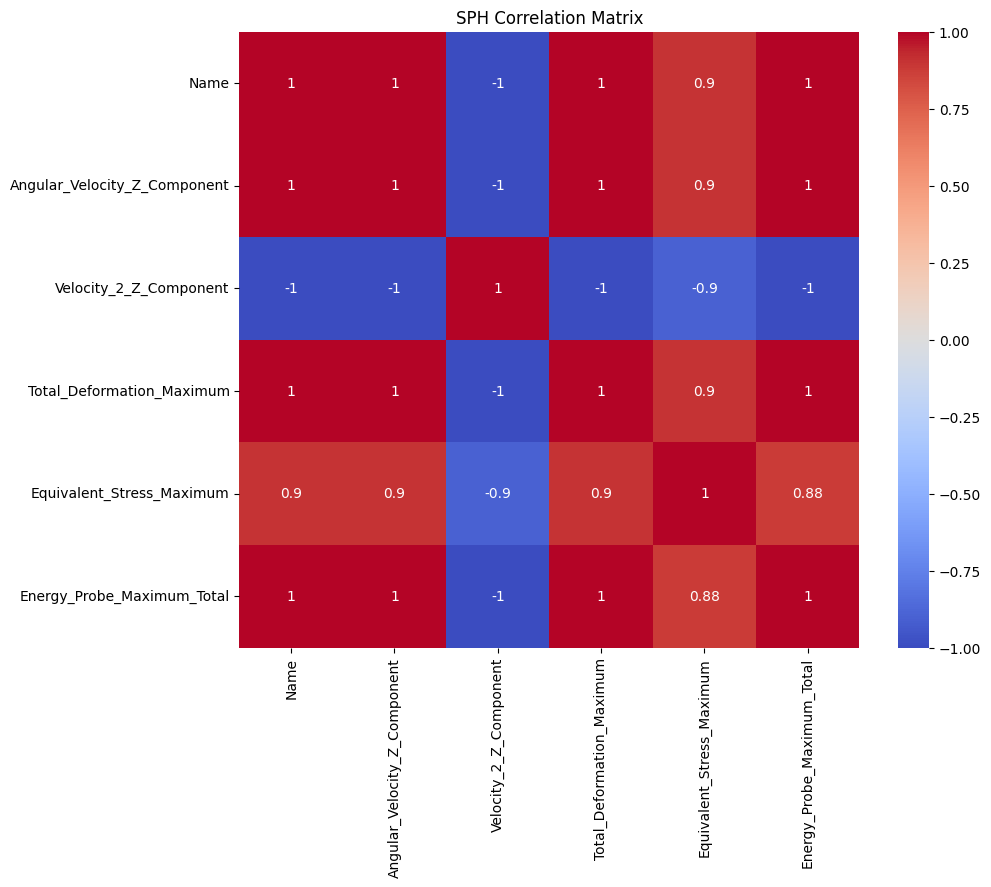

In [50]:
# plot to check colinearity matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create a correlation matrix
corr_matrix = data.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('SPH Correlation Matrix')
plt.show()

In [19]:
# create a new data frame excluding the name column
df_new = data.drop('Name', axis=1)


In [20]:
df_new.head()

,Angular_Velocity_Z_Component,Velocity_2_Z_Component,Total_Deformation_Maximum,Equivalent_Stress_Maximum,Energy_Probe_Maximum_Total
0,395,-122.5,0.32,9.654931e+08,1044616.68
1,400,-125.0,0.32,9.882366e+08,1071678.09
2,405,-127.5,0.33,9.851702e+08,1099089.05
3,410,-130.0,0.33,9.985108e+08,1126849.09
4,415,-132.5,0.33,1.025123e+09,1154959.66


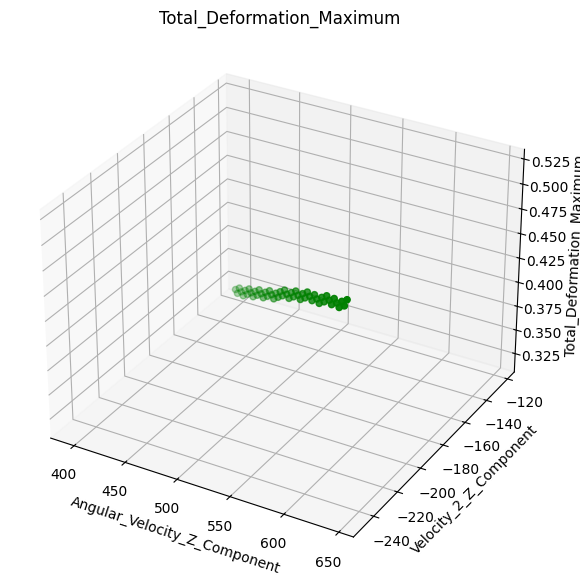

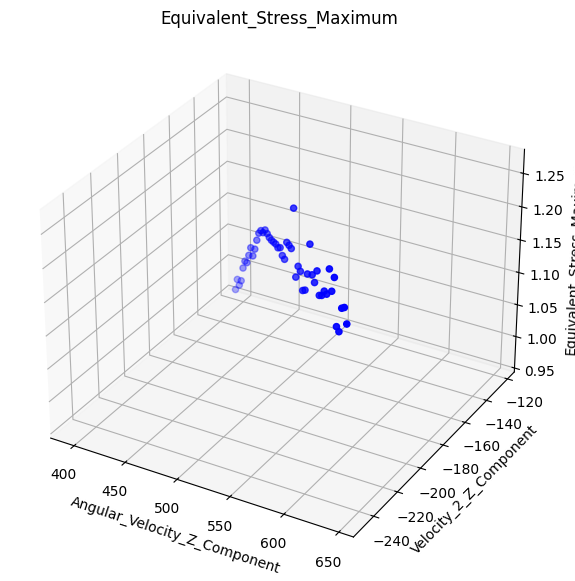

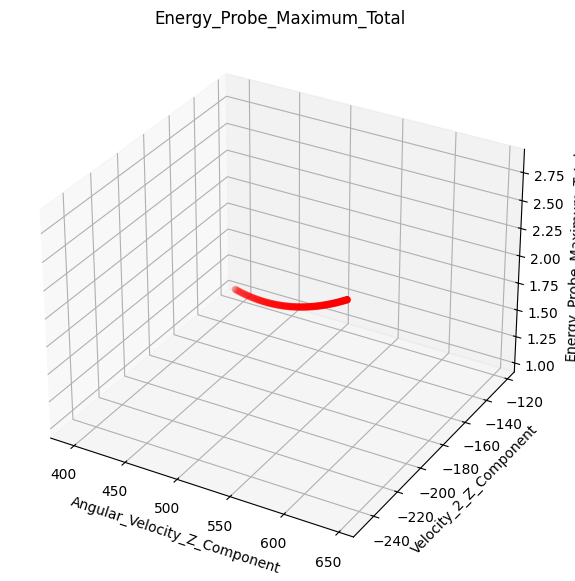

In [46]:
# plots to see the distributions
# plot Total_Deformation_Maximum
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_new['Angular_Velocity_Z_Component'], df_new['Velocity_2_Z_Component'], df_new['Total_Deformation_Maximum'], c='g', marker='o')
ax.set_title('Total_Deformation_Maximum')
ax.set_xlabel('Angular_Velocity_Z_Component')
ax.set_ylabel('Velocity_2_Z_Component')
ax.set_zlabel('Total_Deformation_Maximum')
plt.show()

# plot Equivalent_Stress_Maximum
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_new['Angular_Velocity_Z_Component'], df_new['Velocity_2_Z_Component'], df_new['Equivalent_Stress_Maximum'], c='b', marker='o')
ax.set_title('Equivalent_Stress_Maximum')
ax.set_xlabel('Angular_Velocity_Z_Component')
ax.set_ylabel('Velocity_2_Z_Component')
ax.set_zlabel('Equivalent_Stress_Maximum')
plt.show()

# plot Energy_Probe_Maximum_Total
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_new['Angular_Velocity_Z_Component'], df_new['Velocity_2_Z_Component'], df_new['Energy_Probe_Maximum_Total'], c='r', marker='o')
ax.set_title('Energy_Probe_Maximum_Total')
ax.set_xlabel('Angular_Velocity_Z_Component')
ax.set_ylabel('Velocity_2_Z_Component')
ax.set_zlabel('Energy_Probe_Maximum_Total')
plt.show()

In [22]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# 1. Total Deformation Plot
fig1 = go.Figure(data=[go.Scatter3d(
    x=df_new['Angular_Velocity_Z_Component'],
    y=df_new['Velocity_2_Z_Component'],
    z=df_new['Total_Deformation_Maximum'],
    mode='markers',
    marker=dict(size=5, color='green', opacity=0.8)
)])
fig1.update_layout(title='3D: Total Deformation vs Velocity Components',
                  scene=dict(xaxis_title='Angular Velocity',
                             yaxis_title='Velocity Z component',
                             zaxis_title='Total Deformation'))
fig1.show()

# 2. Equivalent Stress Plot
fig2 = go.Figure(data=[go.Scatter3d(
    x=df_new['Angular_Velocity_Z_Component'],
    y=df_new['Velocity_2_Z_Component'],
    z=df_new['Equivalent_Stress_Maximum'],
    mode='markers',
    marker=dict(size=5, color='blue', opacity=0.8)
)])
fig2.update_layout(title='3D: Equivalent Stress vs Velocity Components',
                  scene=dict(xaxis_title='Angular Velocity',
                             yaxis_title='Velocity Z component',
                             zaxis_title='Equivalent Stress'))
fig2.show()

# 3. Energy Probe Plot
fig3 = go.Figure(data=[go.Scatter3d(
    x=df_new['Angular_Velocity_Z_Component'],
    y=df_new['Velocity_2_Z_Component'],
    z=df_new['Energy_Probe_Maximum_Total'],
    mode='markers',
    marker=dict(size=5, color='red', opacity=0.8)
)])
fig3.update_layout(title='3D: Energy Probe vs Velocity Components',
                  scene=dict(xaxis_title='Angular Velocity',
                             yaxis_title='Velocity Z component',
                             zaxis_title='Energy Probe'))
fig3.show()

# Random Forest

In [23]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error, r2_score
# import numpy as np



# X = df_new[['Angular_Velocity_Z_Component','Equivalent_Stress_Maximum']]
# y = df_new['Total_Deformation_Maximum']

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42
# )

# rf_model = RandomForestRegressor(
#     n_estimators=25,
#     random_state=42,
#     max_depth=5,
#     min_samples_split=2,
#     min_samples_leaf=2,
#     n_jobs=-1,
#     max_features='sqrt'
# )

# rf_model.fit(X_train, y_train)

# y_pred = rf_model.predict(X_test)

# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)
# r2 = r2_score(y_test, y_pred)

# print("Random Forest Regression Results:")
# print(f"RMSE : {rmse:.4f}")
# print(f"R²   : {r2:.4f}")
# print(f"MSE  : {mse:.4f}")

# print ("\n k mean cross validation \n")

# # Do K mean cross validation
# from sklearn.model_selection import KFold
# kf = KFold(n_splits=5, shuffle=True, random_state=42)
# rmse_list = []
# for train_index, test_index in kf.split(X):
#     X_train_kf, X_test_kf = X.iloc[train_index], X.iloc[test_index]
#     y_train_kf, y_test_kf = y.iloc[train_index], y.iloc[test_index]
    
#     rf_model_kf = RandomForestRegressor(
#     n_estimators=25,
#     random_state=42,
#     max_depth=5,
#     min_samples_split=2,
#     min_samples_leaf=2,
#     n_jobs=-1,
#     max_features='sqrt'
#     )
    
#     rf_model_kf.fit(X_train_kf, y_train_kf)
#     y_pred_kf = rf_model_kf.predict(X_test_kf)
    
#     mse_kf = mean_squared_error(y_test_kf, y_pred_kf)
#     r2_kf = r2_score(y_test_kf, y_pred_kf)
#     rmse_kf = np.sqrt(mse_kf)
#     rmse_list.append(rmse_kf)
# average_rmse = np.mean(rmse_list)
# print(f"Average RMSE from K-Fold CV: {average_rmse:.4f}")
# print(f"RMSEs from each fold: {rmse_list}")
# print(f"R²   : {r2_kf:.4f}")
# print(f"MSE  : {mse_kf:.4f}")

# # At fold 4 :
# # likely at very high or very low speeds the model finds harder to predict.

# # Feature imporatnace in number format
# importances = rf_model_kf.feature_importances_
# feature_names = X.columns
# feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
# feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
# print("\nFeature Importances:")
# print(feature_importance_df)



# SVR with RBF

In [47]:

# SVR only supports single-output regression, so we fit one model per target

X = df_new[['Angular_Velocity_Z_Component','Equivalent_Stress_Maximum']]
y = pd.DataFrame({
    'Total_Deformation_Maximum': df_new['Total_Deformation_Maximum'],
    'Equivalent_Stress_Maximum': df_new['Equivalent_Stress_Maximum'] / 1e6,
    'Energy_Probe_Maximum_Total': df_new['Energy_Probe_Maximum_Total'] / 1000
}) # Convert to kJ

targets = y.columns
results = {}

for target in targets:
    # Split data into training and testing sets for this target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    X_train_scaled = StandardScaler().fit_transform(X_train)
    X_test_scaled = StandardScaler().fit_transform(X_test)

    y_train_target = y_train[target]
    y_test_target = y_test[target]

    # Train SVR model
    model = SVR(kernel='rbf', C=160, gamma= 0.1, epsilon=0.1)
    model.fit(X_train_scaled, y_train_target)

    # Make predictions
    y_pred = model.predict(X_test_scaled)

    # Evaluate model
    mse_svr = mean_squared_error(y_test_target, y_pred)
    rmse_svr = np.sqrt(mse_svr)
    r2_svr = r2_score(y_test_target, y_pred)

    print(f"\nResults for {target}:")
    print(f'Mean Squared Error: {mse_svr:.4f}')
    print(f'RMSE: {rmse_svr:.4f}')
    print(f'R² Score: {r2_svr:.4f}')

    # K-Fold cross-validation for SVR
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    rmse_list_svr = []
    for train_index, test_index in kf.split(X):
        X_train_kf, X_test_kf = X.iloc[train_index], X.iloc[test_index]
        y_train_kf = y.iloc[train_index][target]
        y_test_kf = y.iloc[test_index][target]

        # Standardize features for each fold
        scaler_kf = StandardScaler()
        X_train_kf_scaled = scaler_kf.fit_transform(X_train_kf)
        X_test_kf_scaled = scaler_kf.transform(X_test_kf)

        svr_model_kf = SVR(kernel='rbf', C=160, gamma=1, epsilon=0.1)
        svr_model_kf.fit(X_train_kf_scaled, y_train_kf)
        y_pred_kf_svr = svr_model_kf.predict(X_test_kf_scaled)

        mse_kf_svr = mean_squared_error(y_test_kf, y_pred_kf_svr)
        rmse_kf_svr = np.sqrt(mse_kf_svr)
        rmse_list_svr.append(rmse_kf_svr)
        r2_kf_svr = r2_score(y_test_kf, y_pred_kf_svr)

    average_rmse_svr = np.mean(rmse_list_svr)
    print(f"Average MSE from K-Fold CV (SVR): {average_rmse_svr:.4f}")
    print(f"MSEs from each fold (SVR): {rmse_list_svr}")
    print(f"K fold R²   : {r2_kf_svr:.4f}")
    print(f"K fold MSE  : {mse_kf_svr:.4f}")

# Feature importance is not directly available for SVR models


Results for Total_Deformation_Maximum:
Mean Squared Error: 0.0028
RMSE: 0.0527
R² Score: -0.0108
Average MSE from K-Fold CV (SVR): 0.0587
MSEs from each fold (SVR): [np.float64(0.05274294437949194), np.float64(0.06855654600401044), np.float64(0.057532599454570114), np.float64(0.05966573556070519), np.float64(0.05481788029466298)]
K fold R²   : -0.0054
K fold MSE  : 0.0030

Results for Equivalent_Stress_Maximum:
Mean Squared Error: 141.2992
RMSE: 11.8869
R² Score: 0.9643
Average MSE from K-Fold CV (SVR): 4.7151
MSEs from each fold (SVR): [np.float64(2.4239846515364567), np.float64(1.0734218969099822), np.float64(9.516433931442352), np.float64(1.6056630255919944), np.float64(8.955869286146346)]
K fold R²   : 0.9781
K fold MSE  : 80.2076

Results for Energy_Probe_Maximum_Total:
Mean Squared Error: 7763.5226
RMSE: 88.1109
R² Score: 0.9656
Average MSE from K-Fold CV (SVR): 99.7348
MSEs from each fold (SVR): [np.float64(59.56631999526578), np.float64(156.90981443357433), np.float64(98.64424

# Poly Regression

In [48]:
# polynomial regression only supports single-output regression, so we fit one model per target
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
targets = y.columns
for target in targets:
    # Split data into training and testing sets for this target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

    X_train_scaled = StandardScaler().fit_transform(X_train)
    X_test_scaled = StandardScaler().fit_transform(X_test)

    y_train_target = y_train[target]
    y_test_target = y_test[target]

    # Create polynomial features
    poly = PolynomialFeatures(degree=2)
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_test_poly = poly.transform(X_test_scaled)

    # Train polynomial regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train_target)

    # Make predictions
    y_pred = model.predict(X_test_poly)

    # Evaluate model
    mse_poly = mean_squared_error(y_test_target, y_pred)
    rmse_poly = np.sqrt(mse_poly)
    r2_poly = r2_score(y_test_target, y_pred)

    print(f"\nPolynomial Regression Results for {target}:")
    print(f'Mean Squared Error: {mse_poly:.4f}')
    print(f'RMSE: {rmse_poly:.4f}')
    print(f'R² Score: {r2_poly:.4f}')
    # K-Fold cross-validation for Polynomial Regression
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    rmse_list_poly = []
    for train_index, test_index in kf.split(X):
        X_train_kf, X_test_kf = X.iloc[train_index], X.iloc[test_index]
        y_train_kf = y.iloc[train_index][target]
        y_test_kf = y.iloc[test_index][target]

        # Standardize features for each fold
        scaler_kf = StandardScaler()
        X_train_kf_scaled = scaler_kf.fit_transform(X_train_kf)
        X_test_kf_scaled = scaler_kf.transform(X_test_kf)

        # Create polynomial features
        poly_kf = PolynomialFeatures(degree=2)
        X_train_kf_poly = poly_kf.fit_transform(X_train_kf_scaled)
        X_test_kf_poly = poly_kf.transform(X_test_kf_scaled)

        poly_model_kf = LinearRegression()
        poly_model_kf.fit(X_train_kf_poly, y_train_kf)
        y_pred_kf_poly = poly_model_kf.predict(X_test_kf_poly)

        mse_kf_poly = mean_squared_error(y_test_kf, y_pred_kf_poly)
        rmse_kf_poly = np.sqrt(mse_kf_poly)
        rmse_list_poly.append(rmse_kf_poly)
        r2_kf_poly = r2_score(y_test_kf, y_pred_kf_poly)
    average_rmse_poly = np.mean(rmse_list_poly)
    print(f"Average MSE from K-Fold CV (Polynomial Regression): {average_rmse_poly:.4f}")
    print(f"MSEs from each fold (Polynomial Regression): {rmse_list_poly}")
    print(f"K fold R²   : {r2_kf_poly:.4f}")
    print(f"K fold MSE  : {mse_kf_poly:.4f}")

    


Polynomial Regression Results for Total_Deformation_Maximum:
Mean Squared Error: 0.0015
RMSE: 0.0390
R² Score: 0.2648
Average MSE from K-Fold CV (Polynomial Regression): 0.0033
MSEs from each fold (Polynomial Regression): [np.float64(0.003029562380848872), np.float64(0.0034545280748101816), np.float64(0.0031735235362113138), np.float64(0.003026708306096716), np.float64(0.0037312340616279106)]
K fold R²   : 0.9953
K fold MSE  : 0.0000

Polynomial Regression Results for Equivalent_Stress_Maximum:
Mean Squared Error: 2857.2295
RMSE: 53.4531
R² Score: -0.6448
Average MSE from K-Fold CV (Polynomial Regression): 0.0000
MSEs from each fold (Polynomial Regression): [np.float64(1.1874202934156835e-13), np.float64(2.5924587705484056e-13), np.float64(1.9360170842817752e-13), np.float64(1.3451608044987588e-13), np.float64(1.016845989170083e-13)]
K fold R²   : 1.0000
K fold MSE  : 0.0000

Polynomial Regression Results for Energy_Probe_Maximum_Total:
Mean Squared Error: 97274.8094
RMSE: 311.8891
R²

# XGBoost

In [49]:
# XGBoost only supports single-output regression, so we fit one model per target
import xgboost as xgb
targets = y.columns
for target in targets:
    # Split data into training and testing sets for this target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

    X_train_scaled = StandardScaler().fit_transform(X_train)
    X_test_scaled = StandardScaler().fit_transform(X_test)

    y_train_target = y_train[target]
    y_test_target = y_test[target]

    # Train XGBoost model
    model = xgb.XGBRegressor(
        objective='reg:squarederror',
        n_estimators=100,
        learning_rate=0.1,
        max_depth=5,
        random_state=42
    )
    model.fit(X_train_scaled, y_train_target)

    # Make predictions
    y_pred = model.predict(X_test_scaled)

    # Evaluate model
    mse_xgb = mean_squared_error(y_test_target, y_pred)
    rmse_xgb = np.sqrt(mse_xgb)
    r2_xgb = r2_score(y_test_target, y_pred)

    print(f"\nXGBoost Results for {target}:")
    print(f'Mean Squared Error: {mse_xgb:.4f}')
    print(f'RMSE: {rmse_xgb:.4f}')
    print(f'R² Score: {r2_xgb:.4f}')
    # K-Fold cross-validation for XGBoost
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    rmse_list_xgb = []
    for train_index, test_index in kf.split(X):
        X_train_kf, X_test_kf = X.iloc[train_index], X.iloc[test_index]
        y_train_kf = y.iloc[train_index][target]
        y_test_kf = y.iloc[test_index][target]

        # Standardize features for each fold
        scaler_kf = StandardScaler()
        X_train_kf_scaled = scaler_kf.fit_transform(X_train_kf)
        X_test_kf_scaled = scaler_kf.transform(X_test_kf)

        xgb_model_kf = xgb.XGBRegressor(
            objective='reg:squarederror',
            n_estimators=100,
            learning_rate=0.1,
            max_depth=5,
            random_state=42
        )
        xgb_model_kf.fit(X_train_kf_scaled, y_train_kf)
        y_pred_kf_xgb = xgb_model_kf.predict(X_test_kf_scaled)

        mse_kf_xgb = mean_squared_error(y_test_kf, y_pred_kf_xgb)
        rmse_kf_xgb = np.sqrt(mse_kf_xgb)
        rmse_list_xgb.append(rmse_kf_xgb)
        average_rmse_xgb = np.mean(rmse_list_xgb)
        r2_kf_xgb = r2_score(y_test_kf, y_pred_kf_xgb)

    print(f"Average MSE from K-Fold CV (XGBoost): {average_rmse_xgb:.4f}")
    print(f"MSEs from each fold (XGBoost): {rmse_list_xgb}")
    print(f"K fold R²   : {r2_kf_xgb:.4f}")
    print(f"K fold MSE  : {mse_kf_xgb:.4f}")
    
# Feature importance for XGBoost
    importance = model.feature_importances_
    feature_names = X.columns
    feature_importance_df_xgb = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
    feature_importance_df_xgb = feature_importance_df_xgb.sort_values(by='Importance', ascending=False)
    print("\nXGBoost Feature Importances:")
    print(feature_importance_df_xgb)

    


XGBoost Results for Total_Deformation_Maximum:
Mean Squared Error: 0.0015
RMSE: 0.0392
R² Score: 0.2562
Average MSE from K-Fold CV (XGBoost): 0.0065
MSEs from each fold (XGBoost): [np.float64(0.007372333886424675), np.float64(0.0055484183095339265), np.float64(0.005526323135805141), np.float64(0.006108792950782582), np.float64(0.007831341816623828)]
K fold R²   : 0.9795
K fold MSE  : 0.0001

XGBoost Feature Importances:
                        Feature  Importance
0  Angular_Velocity_Z_Component         1.0
1     Equivalent_Stress_Maximum         0.0

XGBoost Results for Equivalent_Stress_Maximum:
Mean Squared Error: 4328.5288
RMSE: 65.7916
R² Score: -1.4918
Average MSE from K-Fold CV (XGBoost): 11.2114
MSEs from each fold (XGBoost): [np.float64(12.12488054114698), np.float64(11.298299506953198), np.float64(10.54855478130155), np.float64(10.971367444174042), np.float64(11.113958526994281)]
K fold R²   : 0.9663
K fold MSE  : 123.5201

XGBoost Feature Importances:
                       

In [45]:
# Neural Network only supports single-output regression, so we fit one model per target
import tensorflow as tf
targets = y.columns
for target in targets:
    # Split data into training and testing sets for this target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

    X_train_scaled = StandardScaler().fit_transform(X_train)
    X_test_scaled = StandardScaler().fit_transform(X_test)

    y_train_target = y_train[target]
    y_test_target = y_test[target]

    # Build neural network model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1)
    ])

    model.compile(optimizer='adam', loss='mse')

    # Train model
    model.fit(X_train_scaled, y_train_target, epochs=100, batch_size=8, verbose=0)

    # Make predictions
    y_pred = model.predict(X_test_scaled).flatten()

    # Evaluate model
    mse_nn = mean_squared_error(y_test_target, y_pred)
    rmse_nn = np.sqrt(mse_nn)
    r2_nn = r2_score(y_test_target, y_pred)

    print(f"\nNeural Network Results for {target}:")
    print(f'Mean Squared Error: {mse_nn:.4f}')
    print(f'RMSE: {rmse_nn:.4f}')
    print(f'R² Score: {r2_nn:.4f}')
    # K-Fold cross-validation for Neural Network
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    rmse_list_nn = []
    for train_index, test_index in kf.split(X):
        X_train_kf, X_test_kf = X.iloc[train_index], X.iloc[test_index]
        y_train_kf = y.iloc[train_index][target]
        y_test_kf = y.iloc[test_index][target]

        # Standardize features for each fold
        scaler_kf = StandardScaler()
        X_train_kf_scaled = scaler_kf.fit_transform(X_train_kf)
        X_test_kf_scaled = scaler_kf.transform(X_test_kf)

        nn_model_kf = tf.keras.Sequential([
            tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_kf_scaled.shape[1],)),
            tf.keras.layers.Dense(32, activation='relu'),
            tf.keras.layers.Dense(1)
        ])

        nn_model_kf.compile(optimizer='adam', loss='mse')

        nn_model_kf.fit(X_train_kf_scaled, y_train_kf, epochs=100, batch_size=8, verbose=0)
        y_pred_kf_nn = nn_model_kf.predict(X_test_kf_scaled).flatten()

        mse_kf_nn = mean_squared_error(y_test_kf, y_pred_kf_nn)
        rmse_kf_nn = np.sqrt(mse_kf_nn)
        rmse_list_nn.append(rmse_kf_nn)
    average_rmse_nn = np.mean(rmse_list_nn)
    print(f"Average MSE from K-Fold CV (Neural Network): {average_rmse_nn:.4f}")
    print(f"MSEs from each fold (Neural Network): {rmse_list_nn}")
    print(f"K fold R²   : {r2_nn:.4f}")

    

c:\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step

Neural Network Results for total_deformation:
Mean Squared Error: 0.0016
RMSE: 0.0395
R² Score: 0.2464


c:\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


c:\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


c:\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


c:\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


c:\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Average MSE from K-Fold CV (Neural Network): 0.0048
MSEs from each fold (Neural Network): [np.float64(0.004982103095894619), np.float64(0.004288831618274053), np.float64(0.005708999264350089), np.float64(0.003897741953714594), np.float64(0.005249454676286241)]
K fold R²   : 0.2464


c:\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step

Neural Network Results for equivalant_stress:
Mean Squared Error: 241237.9462
RMSE: 491.1598
R² Score: -137.8718


c:\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


c:\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


c:\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


c:\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


c:\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
Average MSE from K-Fold CV (Neural Network): 427.6763
MSEs from each fold (Neural Network): [np.float64(470.26953987350123), np.float64(356.08662990886614), np.float64(417.0362814273615), np.float64(479.22720483352566), np.float64(415.7616280051209)]
K fold R²   : -137.8718


c:\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step

Neural Network Results for energy_probe:
Mean Squared Error: 1040876.7969
RMSE: 1020.2337
R² Score: -4.3588


c:\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


c:\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


c:\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


c:\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


c:\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
Average MSE from K-Fold CV (Neural Network): 914.4388
MSEs from each fold (Neural Network): [np.float64(1043.7153808137734), np.float64(672.2170170524961), np.float64(910.764673735288), np.float64(1204.591563173419), np.float64(740.9053442420587)]
K fold R²   : -4.3588


In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np



X = df_new[['Angular_Velocity_Z_Component','Velocity_2_Z_Component']]
y = pd.DataFrame({
    'total_deformation': df_new['Total_Deformation_Maximum'],
    'equivalant_stress': df_new['Equivalent_Stress_Maximum'] / 1e6,
    'energy_probe': df_new['Energy_Probe_Maximum_Total'] / 1000
}) # Convert to kJ

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

rf_model = RandomForestRegressor(
    n_estimators=25,
    random_state=42,
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=2,
    n_jobs=-1,
    max_features='sqrt'
)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Random Forest Regression Results:")
print(f"RMSE : {rmse:.4f}")
print(f"R²   : {r2:.4f}")
print(f"MSE  : {mse:.4f}")

print ("\n k mean cross validation \n")

# Do K mean cross validation
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rmse_list = []
for train_index, test_index in kf.split(X):
    X_train_kf, X_test_kf = X.iloc[train_index], X.iloc[test_index]
    y_train_kf, y_test_kf = y.iloc[train_index], y.iloc[test_index]
    
    rf_model_kf = RandomForestRegressor(
    n_estimators=25,
    random_state=42,
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=2,
    n_jobs=-1,
    max_features='sqrt'
    )
    
    rf_model_kf.fit(X_train_kf, y_train_kf)
    y_pred_kf = rf_model_kf.predict(X_test_kf)
    
    mse_kf = mean_squared_error(y_test_kf, y_pred_kf)
    r2_kf = r2_score(y_test_kf, y_pred_kf)
    rmse_kf = np.sqrt(mse_kf)
    rmse_list.append(rmse_kf)
average_rmse = np.mean(rmse_list)
print(f"Average RMSE from K-Fold CV: {average_rmse:.4f}")
print(f"RMSEs from each fold: {rmse_list}")
print(f"R²   : {r2_kf:.4f}")
print(f"MSE  : {mse_kf:.4f}")

# At fold 4 :
# likely at very high or very low speeds the model finds harder to predict.

# Feature imporatnace in number format
importances = rf_model_kf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("\nFeature Importances:")
print(feature_importance_df)



Random Forest Regression Results:
RMSE : 21.3426
R²   : 0.9632
MSE  : 455.5077

 k mean cross validation 

Average RMSE from K-Fold CV: 24.7994
RMSEs from each fold: [np.float64(21.35478542267051), np.float64(25.229242328620902), np.float64(27.72569269658966), np.float64(23.33394674946102), np.float64(26.35337709051982)]
R²   : 0.9350
MSE  : 694.5005

Feature Importances:
                        Feature  Importance
0  Angular_Velocity_Z_Component    0.547495
1        Velocity_2_Z_Component    0.452505


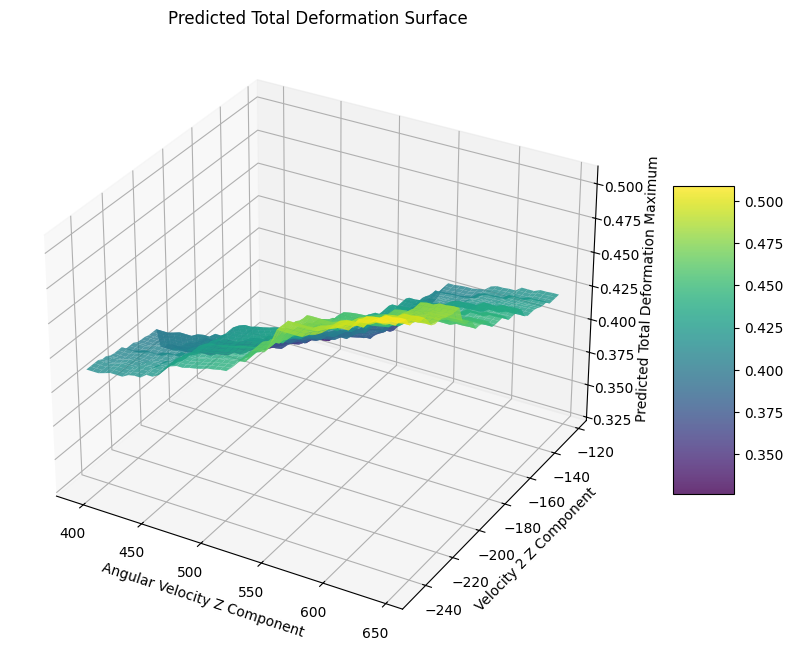

In [56]:
# selecting Random forest 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# Create a grid of values for Angular_Velocity_Z_Component and Velocity_2_Z_Component
# using the range observed in the dataset
angle_velocity_range = np.linspace(df_new['Angular_Velocity_Z_Component'].min(), df_new['Angular_Velocity_Z_Component'].max(), 50)
velocity_z_range = np.linspace(df_new['Velocity_2_Z_Component'].min(), df_new['Velocity_2_Z_Component'].max(), 50)

# Create a meshgrid for predictions
A, V = np.meshgrid(angle_velocity_range, velocity_z_range)

# Prepare the input for prediction
grid_df = pd.DataFrame({
    'Angular_Velocity_Z_Component': A.ravel(),
    'Velocity_2_Z_Component': V.ravel()
})

# Predict Total_Deformation_Maximum using the trained Random Forest model
predicted_td = rf_model.predict(grid_df[['Angular_Velocity_Z_Component', 'Velocity_2_Z_Component']])
predicted_td = predicted_td[:, 0]  # Assuming Total_Deformation_Maximum is the first target
predicted_td = predicted_td.reshape(A.shape)


# predict equivalant_stress
predicted_es = rf_model.predict(grid_df[['Angular_Velocity_Z_Component', 'Velocity_2_Z_Component']])
predicted_es = predicted_es[:, 1]  # Assuming Equivalant_Stress is the second target
predicted_es = predicted_es.reshape(A.shape)

# predict energy_probe
predicted_ep = rf_model.predict(grid_df[['Angular_Velocity_Z_Component', 'Velocity_2_Z_Component']])
predicted_ep = predicted_ep[:, 2]  # Assuming Energy_Probe is the third target
predicted_ep = predicted_ep.reshape(A.shape)

# Plotting the surface
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(A, V, predicted_td, cmap=cm.viridis, edgecolor='none', alpha=0.8)
ax.set_title('Predicted Total Deformation Surface')
ax.set_xlabel('Angular Velocity Z Component')
ax.set_ylabel('Velocity 2 Z Component')
ax.set_zlabel('Predicted Total Deformation Maximum')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
plt.show()



# Total deformation 

In [51]:
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Surface(
        x=angle_velocity_range,
        y=velocity_z_range,
        z=predicted_td,
        colorscale='Viridis',
        opacity=0.8,
        name='Predicted Total Deformation'
    ),
    go.Scatter3d(
        x=df_new['Angular_Velocity_Z_Component'],
        y=df_new['Velocity_2_Z_Component'],
        z=df_new['Total_Deformation_Maximum'],
        mode='markers',
        marker=dict(size=3, color='red', opacity=0.8),
        name='Actual Data Points'
    )
])

fig.update_layout(
    title='SPH: Predicted Total Deformation Surface with Actual Data Points',
    width=1200, 
    height=800,
    margin=dict(l=0, r=0, b=0, t=50),
    scene=dict(
        xaxis_title='Angular Velocity Z Component',
        yaxis_title='Velocity 2 Z Component',
        zaxis_title='Total Deformation Maximum',
        aspectmode='manual', 
        aspectratio=dict(x=2, y=1.5, z=1) # Makes the 'Bird' axis twice as wide
    )
)

fig.show()

In [53]:
df_new.describe()

,Angular_Velocity_Z_Component,Velocity_2_Z_Component,Total_Deformation_Maximum,Equivalent_Stress_Maximum,Energy_Probe_Maximum_Total
count,51.000000,51.000000,51.000000,5.100000e+01,5.100000e+01
mean,520.000000,-185.000000,0.418431,1.156907e+09,1.863810e+06
std,74.330344,37.165172,0.059342,7.690064e+07,5.306435e+05
min,395.000000,-247.500000,0.320000,9.654931e+08,1.044617e+06
25%,457.500000,-216.250000,0.370000,1.133473e+09,1.408042e+06
50%,520.000000,-185.000000,0.420000,1.165263e+09,1.825960e+06
75%,582.500000,-153.750000,0.470000,1.206951e+09,2.298561e+06
max,645.000000,-122.500000,0.520000,1.263824e+09,2.825661e+06


In [ ]:
print(f"Actual equivalent stress Max: {df_new['Equivalent_Stress_Maximum'].max()}")
print(f"Predicted equivalent stress Max: {predicted_es.max()}")

Actual equivalent stress Max: 1263824083.73
Predicted equivalent stress Max: 1236.2002392902132


# Equivalent_Stress_Maximum

In [61]:
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Surface(
        x=angle_velocity_range,
        y=velocity_z_range,
        z=predicted_es * 1e6,  # Convert back to original scale
        colorscale='Viridis',
        opacity=0.8,
        name='Predicted Equivalent_Stress_Maximum'
    ),
    go.Scatter3d(
        x=df_new['Angular_Velocity_Z_Component'],
        y=df_new['Velocity_2_Z_Component'],
        z=df_new['Equivalent_Stress_Maximum'],
        mode='markers',
        marker=dict(size=3, color='red', opacity=0.8),
        name='Actual Data Points'
    )
])

fig.update_layout(
    title='SPH: Predicted Equivalent_Stress_Maximum Surface with Actual Data Points',
    width=1200, 
    height=800,
    margin=dict(l=0, r=0, b=0, t=50),
    scene=dict(
        xaxis_title='Angular Velocity Z Component',
        yaxis_title='Velocity 2 Z Component',
        zaxis_title='Equivalent_Stress_Maximum',
        aspectmode='manual', 
        aspectratio=dict(x=2, y=1.5, z=1) # Makes the 'Bird' axis twice as wide
    )
)

fig.show()

In [64]:
print(f"Actual energy probe Max: {df_new['Energy_Probe_Maximum_Total'].max()}")
print(f"Predicted energy probe Max: {predicted_ep.max()}")

Actual energy probe Max: 2825660.74
Predicted energy probe Max: 2747.215126832381


# Energy_Probe_Maximum_Total

In [68]:
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Surface(
        x=angle_velocity_range,
        y=velocity_z_range,
        z=predicted_ep * 1000,  # Convert back to original scale
        colorscale='Viridis',
        opacity=0.8,
        name='Predicted Energy_Probe'
    ),
    go.Scatter3d(
        x=df_new['Angular_Velocity_Z_Component'],
        y=df_new['Velocity_2_Z_Component'],
        z=df_new['Energy_Probe_Maximum_Total'],
        mode='markers',
        marker=dict(size=3, color='red', opacity=0.8),
        name='Actual Data Points'
    )
])

fig.update_layout(
    title='SPH: Predicted Energy_Probe_Maximum_Total Surface with Actual Data Points',
    width=1200, 
    height=800,
    margin=dict(l=0, r=0, b=0, t=50),
    scene=dict(
        xaxis_title='Angular Velocity Z Component',
        yaxis_title='Velocity 2 Z Component',
        zaxis_title='Energy_Probe_Maximum_Total',
        aspectmode='manual', 
        aspectratio=dict(x=2, y=1.5, z=1) # Makes the 'Bird' axis twice as wide
    )
)

fig.show()